In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as trans

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.linalg as LN

import os,time,random
os.sys.path.insert(0,'../')
import utils

In [2]:
train_set = dsets.MNIST(root='/home/leiwu/data/mnist',train=True, transform=trans.ToTensor(),download=True)
test_set  = dsets.MNIST(root='/home/leiwu/data/mnist',train=False,transform=trans.ToTensor(),download=False)
trX,trY,teX,teY = train_set.train_data, train_set.train_labels,test_set.test_data, test_set.test_labels

def shuffle(X,y):
    n = X.shape[0]
    assert y.shape[0]==n,'number of samples should match'
    idx = np.arange(n)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    return X,y

def 

class LinearClassifier(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearClassifier,self).__init__()
        self.W = Variable(torch.zeros(input_dim,output_dim),requires_grad=True)
#         self.fc = nn.Linear(input_dim,output_dim)
    
    def forward(self,x):
        o = torch.mm(x,self.W)
        return o

Files already downloaded


2.44753309563
[ 30.59169186   8.00687097   4.47360456   2.64299575   1.88595456
   1.4209996    1.00978344   0.90880165   0.81436173   0.75014001
   0.64741157   0.54030683   0.48947767   0.4579028    0.4200581
   0.40909355   0.39029263   0.34291381   0.32963447   0.29592114
   0.27971455   0.27236002   0.25639874   0.23603478   0.22843534
   0.20479152   0.19513968   0.18801307   0.17319457   0.16777411
   0.16313661   0.15660521   0.15231319   0.14324707   0.14021376
   0.13745359   0.12768588   0.12144256   0.11721658]


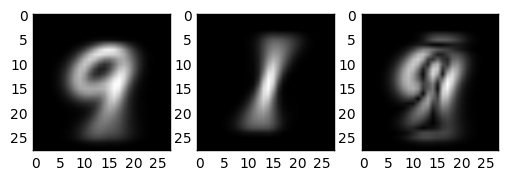

In [20]:
X,y = trX.numpy(),trY.numpy()
idx = y==9
X0,y0 = X[idx],y[idx]
X0 = X0.astype(np.float)/255
y0.fill(-1)

idx = y==1
X1,y1 = X[idx],y[idx]
X1 = X1.astype(np.float)/255

X = np.concatenate((X0,X1),axis=0)
y = np.concatenate((y0,y1),axis=0).astype(np.float).reshape(-1,1)
X,y = shuffle(X,y)


N = X.shape[0]
W,H = 28,28
X = X.reshape(N,W*H)
X_mean = X.mean(axis=0)
# X = X - X_mean
S = np.dot(np.transpose(X),X)/N
eigs,eigv = scipy.linalg.eigh(S)


mean0 = X0.mean(axis=0)
mean1 = X1.mean(axis=0)
mean_d = mean0 - mean1

plt.subplot(1,3,1); plt.imshow(mean0,cmap='gray')
plt.subplot(1,3,2); plt.imshow(mean1,cmap='gray')
plt.subplot(1,3,3); plt.imshow(np.abs(mean_d),cmap='gray')

print(np.linalg.norm(mean_d,1)/784*255)
print(eigs[:-40:-1])

In [25]:
W = np.zeros((784,1))
b = 0
lr = 0.05
mu = 0.01
for i in range(10000):
    dy = np.dot(X,W) + b - y
    E  = np.linalg.norm(dy,ord='fro')**2/(2*N)
    dW = np.dot(np.transpose(X),dy)/N
    db = dy / N
    W  = W - lr * (dW + mu * W) 
    b  = b - lr * (db + mu* b)
    
    if i % 500 ==0:
        print('%d, %.2e, %.2e'%(i,E,np.linalg.norm(W)))

0, 5.00e-01, 1.30e-01
500, 2.69e-02, 6.01e-01
1000, 2.59e-02, 6.62e-01
1500, 2.55e-02, 6.92e-01
2000, 2.53e-02, 7.08e-01
2500, 2.52e-02, 7.18e-01
3000, 2.51e-02, 7.25e-01
3500, 2.51e-02, 7.29e-01
4000, 2.50e-02, 7.32e-01
4500, 2.50e-02, 7.33e-01
5000, 2.50e-02, 7.35e-01
5500, 2.50e-02, 7.36e-01
6000, 2.50e-02, 7.36e-01
6500, 2.50e-02, 7.37e-01
7000, 2.50e-02, 7.37e-01
7500, 2.49e-02, 7.37e-01
8000, 2.49e-02, 7.37e-01
8500, 2.49e-02, 7.37e-01
9000, 2.49e-02, 7.38e-01
9500, 2.49e-02, 7.38e-01


('L1 norm of W', 18.710240889878591)


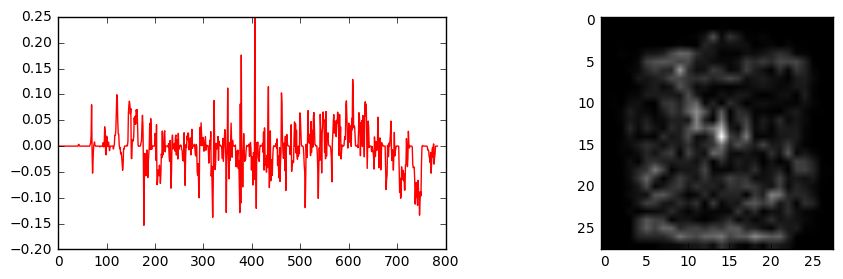

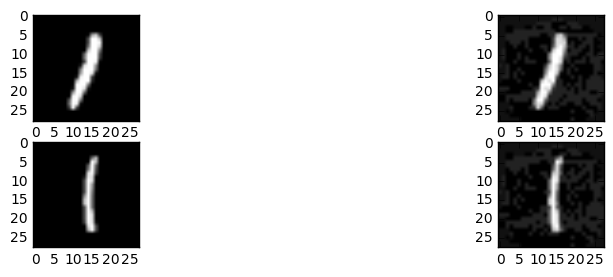

In [24]:
plt.figure(figsize=(11,3))
plt.subplot(1,2,1); plt.plot(W,'-r')
W_ = np.abs(W.reshape(28,28))
W_ = W_ / W_.max()
plt.subplot(1,2,2); plt.imshow(W_,cmap='gray')


perturbation = np.sign(W.squeeze())*20/255.0
Xnew = X + np.expand_dims(perturbation,axis=0)

plt.figure(figsize=(11,3))
k,l=np.random.randint(0,N),np.random.randint(0,N)
plt.subplot(2,2,1); plt.imshow(X[k].reshape(28,28),cmap='gray')
plt.subplot(2,2,2); plt.imshow(Xnew[k].reshape(28,28),cmap='gray')
plt.subplot(2,2,3); plt.imshow(X[l].reshape(28,28),cmap='gray')
plt.subplot(2,2,4); plt.imshow(Xnew[l].reshape(28,28),cmap='gray')
   

print('L1 norm of W',np.linalg.norm(W,1))

In [ ]:
N = 60000
d = 28*28
X,Y = np.ones((N,d+1)),np.zeros((N,10))
X[:,1:]=train_set.train_data.numpy().reshape((N,28*28)).astype(np.float32)/255
labels = train_set.train_labels
for i,l in enumerate(labels):
    Y[i][l]=1

A = np.dot(X.transpose(),X)
b = np.dot(X.transpose(),Y)
A_ = A + np.eye(d+1)*1e-5
beta = scipy.linalg.solve(A_,b,assume_a='sym')
# # print(X.max())
# X = X[0:50000]
# X = X.astype(np.float32)
# V = np.dot(X.transpose(),X)/X.shape[0]
# S=LN.eigvalsh(V)
# S = S[::-1]
# S = np.cumsum(S)
# S = S / S[-1]*100
# plt.plot(S,'o')